In [107]:
#Gerekli kutuphanelerin yuklenmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [108]:
# Veri setlerini okuma
b0005_data = pd.read_csv("C:\\Users\\hasan\\OneDrive\\Masaüstü\\staj\\orjinal_veri\\B0005.csv")
b0006_data = pd.read_csv("C:\\Users\\hasan\\OneDrive\\Masaüstü\\staj\\orjinal_veri\\B0006.csv")
b0018_data = pd.read_csv("C:\\Users\\hasan\\OneDrive\\Masaüstü\\staj\\orjinal_veri\\B0018.csv")

# İlk ve son 5 satiri gosterme
b0005_head = b0005_data.head(-5)
b0006_head = b0006_data.head(-5)
b0018_head = b0018_data.head(-5)

b0005_head, b0006_head, b0018_head

(       cycle  ambient_temperature             datetime  capacity  \
 0          1                   24  2008-04-02 15:25:41  1.856487   
 1          1                   24  2008-04-02 15:25:41  1.856487   
 2          1                   24  2008-04-02 15:25:41  1.856487   
 3          1                   24  2008-04-02 15:25:41  1.856487   
 4          1                   24  2008-04-02 15:25:41  1.856487   
 ...      ...                  ...                  ...       ...   
 50275    168                   24  2008-05-27 20:45:42  1.325079   
 50276    168                   24  2008-05-27 20:45:42  1.325079   
 50277    168                   24  2008-05-27 20:45:42  1.325079   
 50278    168                   24  2008-05-27 20:45:42  1.325079   
 50279    168                   24  2008-05-27 20:45:42  1.325079   
 
        voltage_measured  current_measured  temperature_measured  current_load  \
 0              4.191492         -0.004902             24.330034       -0.0006   
 1    

In [109]:
# Eksik veri kontrolu
missing_values_b0005 = b0005_data.isnull().sum()
missing_values_b0006 = b0006_data.isnull().sum()
missing_values_b0018 = b0018_data.isnull().sum()

missing_values_b0005, missing_values_b0006, missing_values_b0018

(cycle                   0
 ambient_temperature     0
 datetime                0
 capacity                0
 voltage_measured        0
 current_measured        0
 temperature_measured    0
 current_load            0
 voltage_load            0
 time                    0
 dtype: int64,
 cycle                   0
 ambient_temperature     0
 datetime                0
 capacity                0
 voltage_measured        0
 current_measured        0
 temperature_measured    0
 current_load            0
 voltage_load            0
 time                    0
 dtype: int64,
 cycle                   0
 ambient_temperature     0
 datetime                0
 capacity                0
 voltage_measured        0
 current_measured        0
 temperature_measured    0
 current_load            0
 voltage_load            0
 time                    0
 dtype: int64)

In [110]:
# SoH degeri hesaplama
# Nominal kapasiteyi belirleme
nominal_capacity_b0005 = b0005_data['capacity'].max()
nominal_capacity_b0006 = b0006_data['capacity'].max()
nominal_capacity_b0018 = b0018_data['capacity'].max()

# SoH hesaplama fonksiyonu
def calculate_soh(df, nominal_capacity):
    df['SoH'] = (df['capacity'] / nominal_capacity) * 100
    return df

# SoH hesaplamalari
b0005_data_soh = calculate_soh(b0005_data.copy(), nominal_capacity_b0005)
b0006_data_soh = calculate_soh(b0006_data.copy(), nominal_capacity_b0006)
b0018_data_soh = calculate_soh(b0018_data.copy(), nominal_capacity_b0018)

# İlk ve son 5 satiri gosterme
b0005_data_soh.head(-5), b0006_data_soh.head(-5), b0018_data_soh.head(-5)

(       cycle  ambient_temperature             datetime  capacity  \
 0          1                   24  2008-04-02 15:25:41  1.856487   
 1          1                   24  2008-04-02 15:25:41  1.856487   
 2          1                   24  2008-04-02 15:25:41  1.856487   
 3          1                   24  2008-04-02 15:25:41  1.856487   
 4          1                   24  2008-04-02 15:25:41  1.856487   
 ...      ...                  ...                  ...       ...   
 50275    168                   24  2008-05-27 20:45:42  1.325079   
 50276    168                   24  2008-05-27 20:45:42  1.325079   
 50277    168                   24  2008-05-27 20:45:42  1.325079   
 50278    168                   24  2008-05-27 20:45:42  1.325079   
 50279    168                   24  2008-05-27 20:45:42  1.325079   
 
        voltage_measured  current_measured  temperature_measured  current_load  \
 0              4.191492         -0.004902             24.330034       -0.0006   
 1    

In [111]:
# Gurultulu verilerin temizlenmesi --> IQR Yontemi
def remove_outliers_iqr(df):
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    filter = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[filter]

# Temizlenmis veri setleri
b0005_clean_iqr = remove_outliers_iqr(b0005_data_soh)
b0006_clean_iqr = remove_outliers_iqr(b0006_data_soh)
b0018_clean_iqr = remove_outliers_iqr(b0018_data_soh)

# Temizlenmis veri setlerinin boyutlarini kontrol etme
b0005_clean_iqr.shape, b0006_clean_iqr.shape, b0018_clean_iqr.shape

((37956, 11), (37303, 11), (30721, 11))

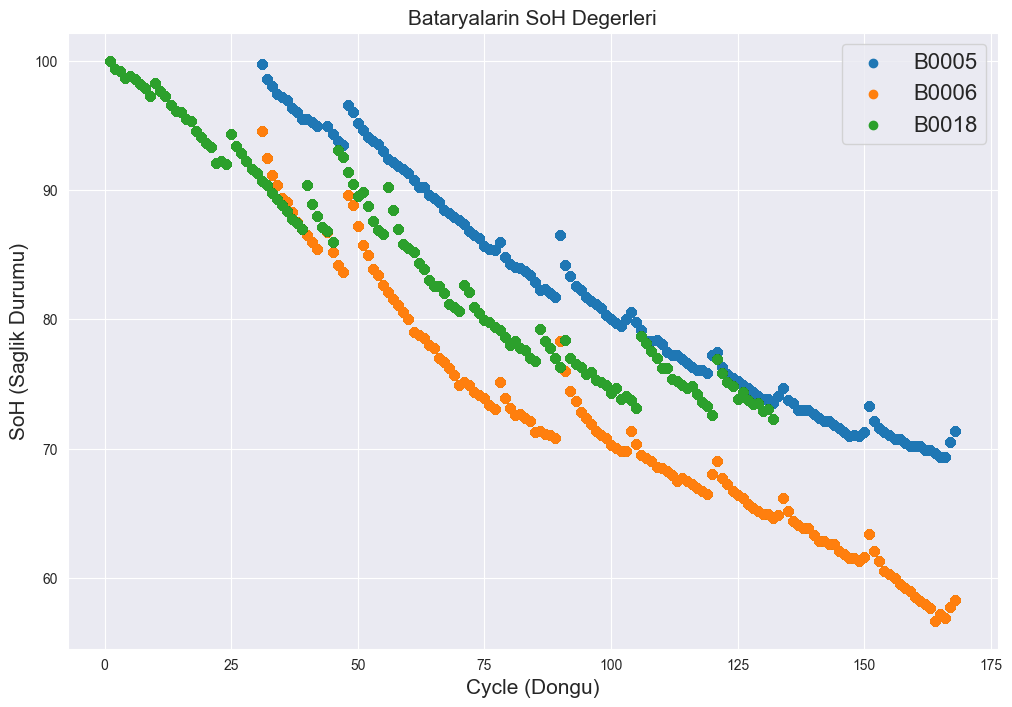

In [112]:
# Uc bataryanın SoH degerlerini tek bir grafikte gosterme
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

# B0005 Bataryasi
plt.scatter(b0005_clean_iqr['cycle'], b0005_clean_iqr['SoH'], label='B0005')

# B0006 Bataryasi
plt.scatter(b0006_clean_iqr['cycle'], b0006_clean_iqr['SoH'], label='B0006')

# B0018 Bataryasi
plt.scatter(b0018_clean_iqr['cycle'], b0018_clean_iqr['SoH'], label='B0018')

plt.legend(prop={'size': 16})
plt.xlabel('Cycle (Dongu)', fontsize=15)
plt.ylabel('SoH (Saglik Durumu)', fontsize=15)
plt.title('Bataryalarin SoH Degerleri', fontsize=15)
plt.show()

In [113]:
# MinMaxScaler'i baslatma
scaler = MinMaxScaler()

# Normalizasyon fonksiyonu
def normalize_dataset(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

# Veri setlerini normallestirme
b0005_normalized = normalize_dataset(b0005_clean_iqr.copy())
b0006_normalized = normalize_dataset(b0006_clean_iqr.copy())
b0018_normalized = normalize_dataset(b0018_clean_iqr.copy())

# İlk birkac satriri gosterme
b0005_normalized.head(), b0006_normalized.head(), b0018_normalized.head()

(      cycle  ambient_temperature             datetime  capacity  \
 5648    0.0                  0.0  2008-04-22 15:33:49       1.0   
 5649    0.0                  0.0  2008-04-22 15:33:49       1.0   
 5650    0.0                  0.0  2008-04-22 15:33:49       1.0   
 5651    0.0                  0.0  2008-04-22 15:33:49       1.0   
 5652    0.0                  0.0  2008-04-22 15:33:49       1.0   
 
       voltage_measured  current_measured  temperature_measured  current_load  \
 5648          0.989625          0.647758              0.033105           0.5   
 5649          0.974667          0.262381              0.036503           0.5   
 5650          0.963097          0.374477              0.041727           0.5   
 5651          0.953527          0.339513              0.047431           0.5   
 5652          0.944897          0.682359              0.053014           1.0   
 
       voltage_load      time  SoH  
 5648      0.999005  0.000034  1.0  
 5649      0.985075  0.00292

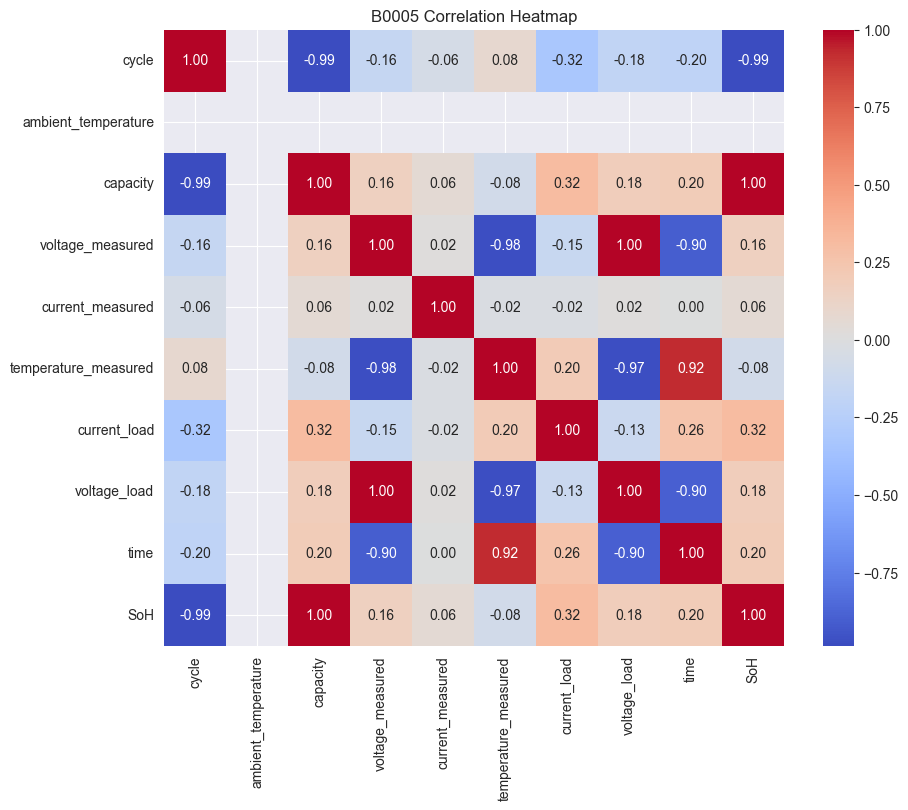

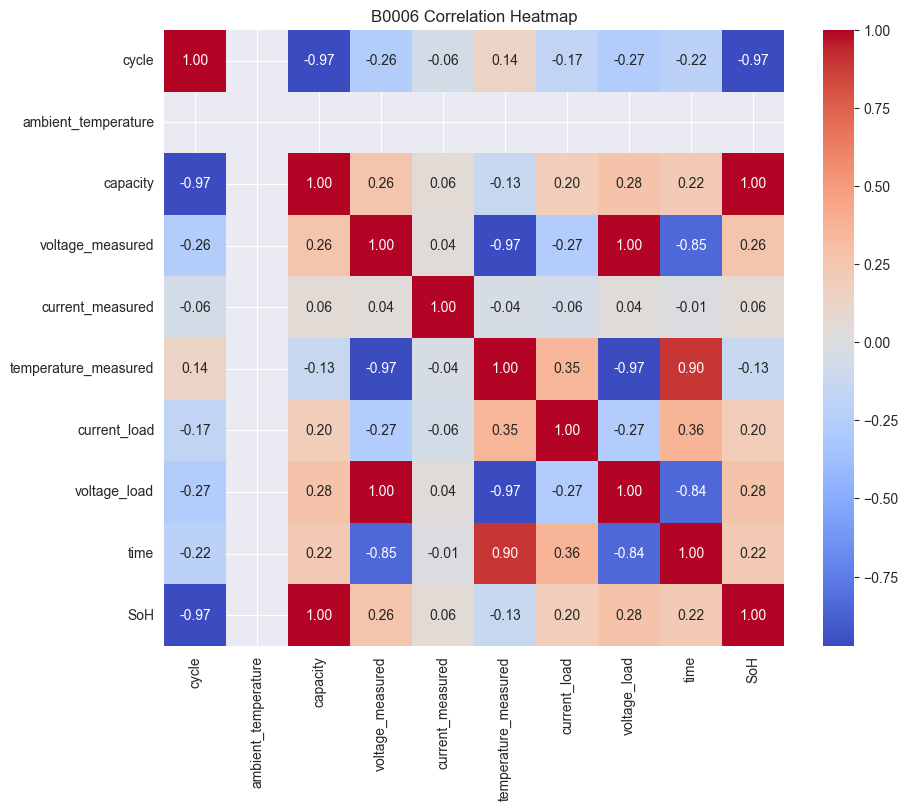

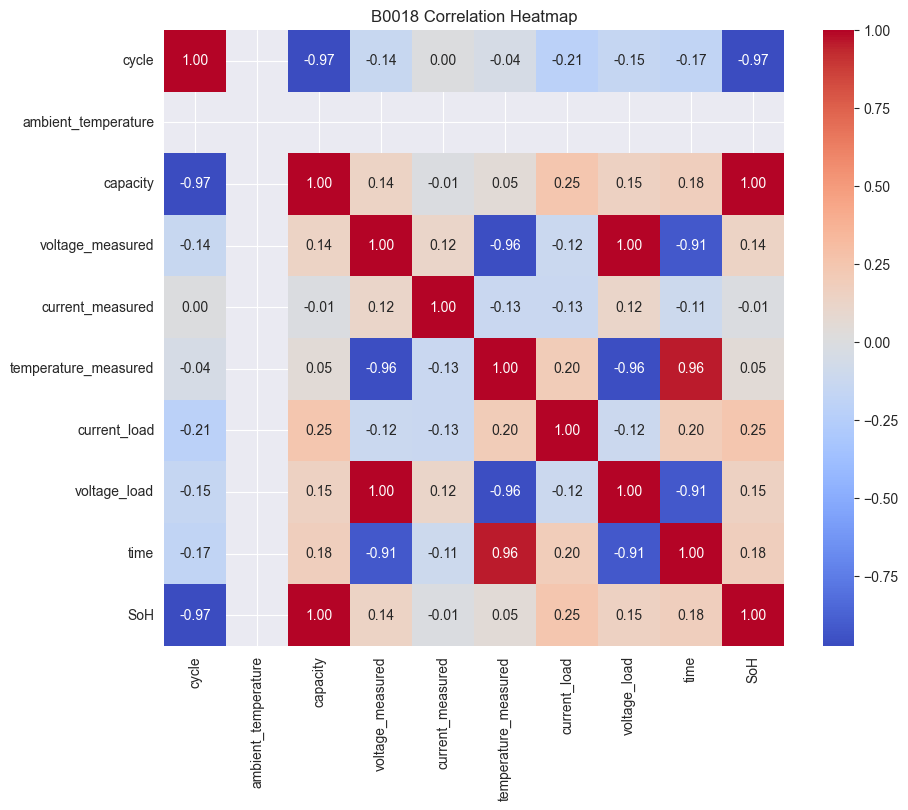

In [114]:
# Korelasyon analizi ve heatmap olusturma fonksiyonu
def plot_heatmap(df, title):
    numeric_df = df.select_dtypes(include=[np.number])  # Sadece sayisal sutunlari sec
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# Heatmap olusturma
plot_heatmap(b0005_clean_iqr, 'B0005 Correlation Heatmap')
plot_heatmap(b0006_clean_iqr, 'B0006 Correlation Heatmap')
plot_heatmap(b0018_clean_iqr, 'B0018 Correlation Heatmap')

In [126]:
# Ozellik onemini hesaplama fonksiyonu
def feature_importance(df, target_column):
    X = df.drop(columns=[target_column, 'datetime'])
    y = df[target_column]
    model = DecisionTreeRegressor()
    model.fit(X, y)
    feature_importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Ozellik': feature_names, 'Onem': feature_importances})
    return importance_df.sort_values(by='Onem', ascending=False)

# Ozellik onemini hesaplama
b0005_feature_importance = feature_importance(b0005_clean_iqr, 'SoH')
b0006_feature_importance = feature_importance(b0006_clean_iqr, 'SoH')
b0018_feature_importance = feature_importance(b0018_clean_iqr, 'SoH')

# Ozellik onemlerini gosterme
print("B0005 Ozelligin Onemi:\n", b0005_feature_importance)
print("B0006 Ozelligin Onemi:\n", b0006_feature_importance)
print("B0018 Ozelligin Onemi:\n", b0018_feature_importance)

B0005 Ozelligin Onemi:
                 Ozellik          Onem
2              capacity  9.880894e-01
0                 cycle  1.191065e-02
7          voltage_load  4.515539e-13
3      voltage_measured  2.357198e-13
5  temperature_measured  2.047378e-13
4      current_measured  1.293776e-13
8                  time  1.250958e-13
6          current_load  3.955773e-14
1   ambient_temperature  0.000000e+00
B0006 Ozelligin Onemi:
                 Ozellik          Onem
2              capacity  9.925786e-01
0                 cycle  7.421417e-03
3      voltage_measured  2.032669e-13
4      current_measured  1.774196e-13
5  temperature_measured  1.210223e-13
8                  time  1.186013e-13
7          voltage_load  1.064477e-13
6          current_load  2.629392e-14
1   ambient_temperature  0.000000e+00
B0018 Ozelligin Onemi:
                 Ozellik          Onem
2              capacity  9.984864e-01
0                 cycle  1.513605e-03
7          voltage_load  2.658843e-13
3      voltage_m

In [116]:
# Veri setlerinin egitim ve test setlerine ayrilmasi
from sklearn.model_selection import train_test_split

# Veri setlerini egitim ve test setlerine ayirma
def split_dataset(df, target_column):
    X = df.drop(columns=[target_column, 'datetime'])#sayisal deger olmadigi icin hata veriyor cikardik
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Egitim ve test setlerine ayirma
b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test = split_dataset(b0005_normalized, 'SoH')
b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test = split_dataset(b0006_normalized, 'SoH')
b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test = split_dataset(b0018_normalized, 'SoH')

In [117]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate_with_knn(X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return model, rmse, r2

# KNN Model Performans
b0005_knn_model, b0005_knn_rmse, b0005_knn_r2 = train_and_evaluate_with_knn(b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test)
b0006_knn_model, b0006_knn_rmse, b0006_knn_r2 = train_and_evaluate_with_knn(b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test)
b0018_knn_model, b0018_knn_rmse, b0018_knn_r2 = train_and_evaluate_with_knn(b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test)

print("B0005 KNN Model RMSE:", b0005_knn_rmse)
print("B0005 KNN Model R^2:", b0005_knn_r2)

print("B0006 KNN Model RMSE:", b0006_knn_rmse)
print("B0006 KNN Model R^2:", b0006_knn_r2)

print("B0018 KNN Model RMSE:", b0018_knn_rmse)
print("B0018 KNN Model R^2:", b0018_knn_r2)

B0005 KNN Model RMSE: 0.011477145674875367
B0005 KNN Model R^2: 0.9984983670128823
B0006 KNN Model RMSE: 0.012117910605342598
B0006 KNN Model R^2: 0.9976944868872349
B0018 KNN Model RMSE: 0.01427678760286855
B0018 KNN Model R^2: 0.9977919212888002


In [118]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

def train_and_evaluate_with_gb(X_train, X_test, y_train, y_test):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return model, rmse, r2

# Gradient Boosting Model Performans
b0005_gb_model, b0005_gb_rmse, b0005_gb_r2 = train_and_evaluate_with_gb(b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test)
b0006_gb_model, b0006_gb_rmse, b0006_gb_r2 = train_and_evaluate_with_gb(b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test)
b0018_gb_model, b0018_gb_rmse, b0018_gb_r2 = train_and_evaluate_with_gb(b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test)

print("B0005 Gradient Boosting Model RMSE:", b0005_gb_rmse)
print("B0005 Gradient Boosting Model R^2:", b0005_gb_r2)

print("B0006 Gradient Boosting Model RMSE:", b0006_gb_rmse)
print("B0006 Gradient Boosting Model R^2:", b0006_gb_r2)

print("B0018 Gradient Boosting Model RMSE:", b0018_gb_rmse)
print("B0018 Gradient Boosting Model R^2:", b0018_gb_r2)

B0005 Gradient Boosting Model RMSE: 0.00039752212374410137
B0005 Gradient Boosting Model R^2: 0.9999981985649022
B0006 Gradient Boosting Model RMSE: 0.0006523753247858438
B0006 Gradient Boosting Model R^2: 0.9999933179894024
B0018 Gradient Boosting Model RMSE: 0.0005704460474296552
B0018 Gradient Boosting Model R^2: 0.9999964748085824


In [119]:
#Support Vector Regression (SVR)
from sklearn.svm import SVR

def train_and_evaluate_with_svr(X_train, X_test, y_train, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return model, rmse, r2

# SVR Model Performans
b0005_svr_model, b0005_svr_rmse, b0005_svr_r2 = train_and_evaluate_with_svr(b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test)
b0006_svr_model, b0006_svr_rmse, b0006_svr_r2 = train_and_evaluate_with_svr(b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test)
b0018_svr_model, b0018_svr_rmse, b0018_svr_r2 = train_and_evaluate_with_svr(b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test)

print("B0005 SVR Model RMSE:", b0005_svr_rmse)
print("B0005 SVR Model R^2:", b0005_svr_r2)

print("B0006 SVR Model RMSE:", b0006_svr_rmse)
print("B0006 SVR Model R^2:", b0006_svr_r2)

print("B0018 SVR Model RMSE:", b0018_svr_rmse)
print("B0018 SVR Model R^2:", b0018_svr_r2)

B0005 SVR Model RMSE: 0.04703171135655043
B0005 SVR Model R^2: 0.9747839198784531
B0006 SVR Model RMSE: 0.05382347214616844
B0006 SVR Model R^2: 0.9545163269350855
B0018 SVR Model RMSE: 0.040774330645079376
B0018 SVR Model R^2: 0.9819894392634863


In [120]:
#Neural Network (MLPRegressor)
from sklearn.neural_network import MLPRegressor

def train_and_evaluate_with_nn(X_train, X_test, y_train, y_test):
    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return model, rmse, r2

# Neural Network Model Performans
b0005_nn_model, b0005_nn_rmse, b0005_nn_r2 = train_and_evaluate_with_nn(b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test)
b0006_nn_model, b0006_nn_rmse, b0006_nn_r2 = train_and_evaluate_with_nn(b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test)
b0018_nn_model, b0018_nn_rmse, b0018_nn_r2 = train_and_evaluate_with_nn(b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test)

print("B0005 Neural Network Model RMSE:", b0005_nn_rmse)
print("B0005 Neural Network Model R^2:", b0005_nn_r2)

print("B0006 Neural Network Model RMSE:", b0006_nn_rmse)
print("B0006 Neural Network Model R^2:", b0006_nn_r2)

print("B0018 Neural Network Model RMSE:", b0018_nn_rmse)
print("B0018 Neural Network Model R^2:", b0018_nn_r2)

B0005 Neural Network Model RMSE: 0.0020415235803766677
B0005 Neural Network Model R^2: 0.9999524878357992
B0006 Neural Network Model RMSE: 0.0033194347086518364
B0006 Neural Network Model R^2: 0.9998270022839868
B0018 Neural Network Model RMSE: 0.003536000332481123
B0018 Neural Network Model R^2: 0.999864550268681


In [121]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

def train_and_evaluate_with_rf(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return model, rmse, r2

# Random Forest Model Performans
b0005_rf_model, b0005_rf_rmse, b0005_rf_r2 = train_and_evaluate_with_rf(b0005_X_train, b0005_X_test, b0005_y_train, b0005_y_test)
b0006_rf_model, b0006_rf_rmse, b0006_rf_r2 = train_and_evaluate_with_rf(b0006_X_train, b0006_X_test, b0006_y_train, b0006_y_test)
b0018_rf_model, b0018_rf_rmse, b0018_rf_r2 = train_and_evaluate_with_rf(b0018_X_train, b0018_X_test, b0018_y_train, b0018_y_test)

print("B0005 Random Forest Model RMSE:", b0005_rf_rmse)
print("B0005 Random Forest Model R^2:", b0005_rf_r2)

print("B0006 Random Forest Model RMSE:", b0006_rf_rmse)
print("B0006 Random Forest Model R^2:", b0006_rf_r2)

print("B0018 Random Forest Model RMSE:", b0018_rf_rmse)
print("B0018 Random Forest Model R^2:", b0018_rf_r2)

B0005 Random Forest Model RMSE: 8.400093322440106e-16
B0005 Random Forest Model R^2: 1.0
B0006 Random Forest Model RMSE: 8.562389229017217e-16
B0006 Random Forest Model R^2: 1.0
B0018 Random Forest Model RMSE: 9.209485817087802e-07
B0018 Random Forest Model R^2: 0.9999999999908119


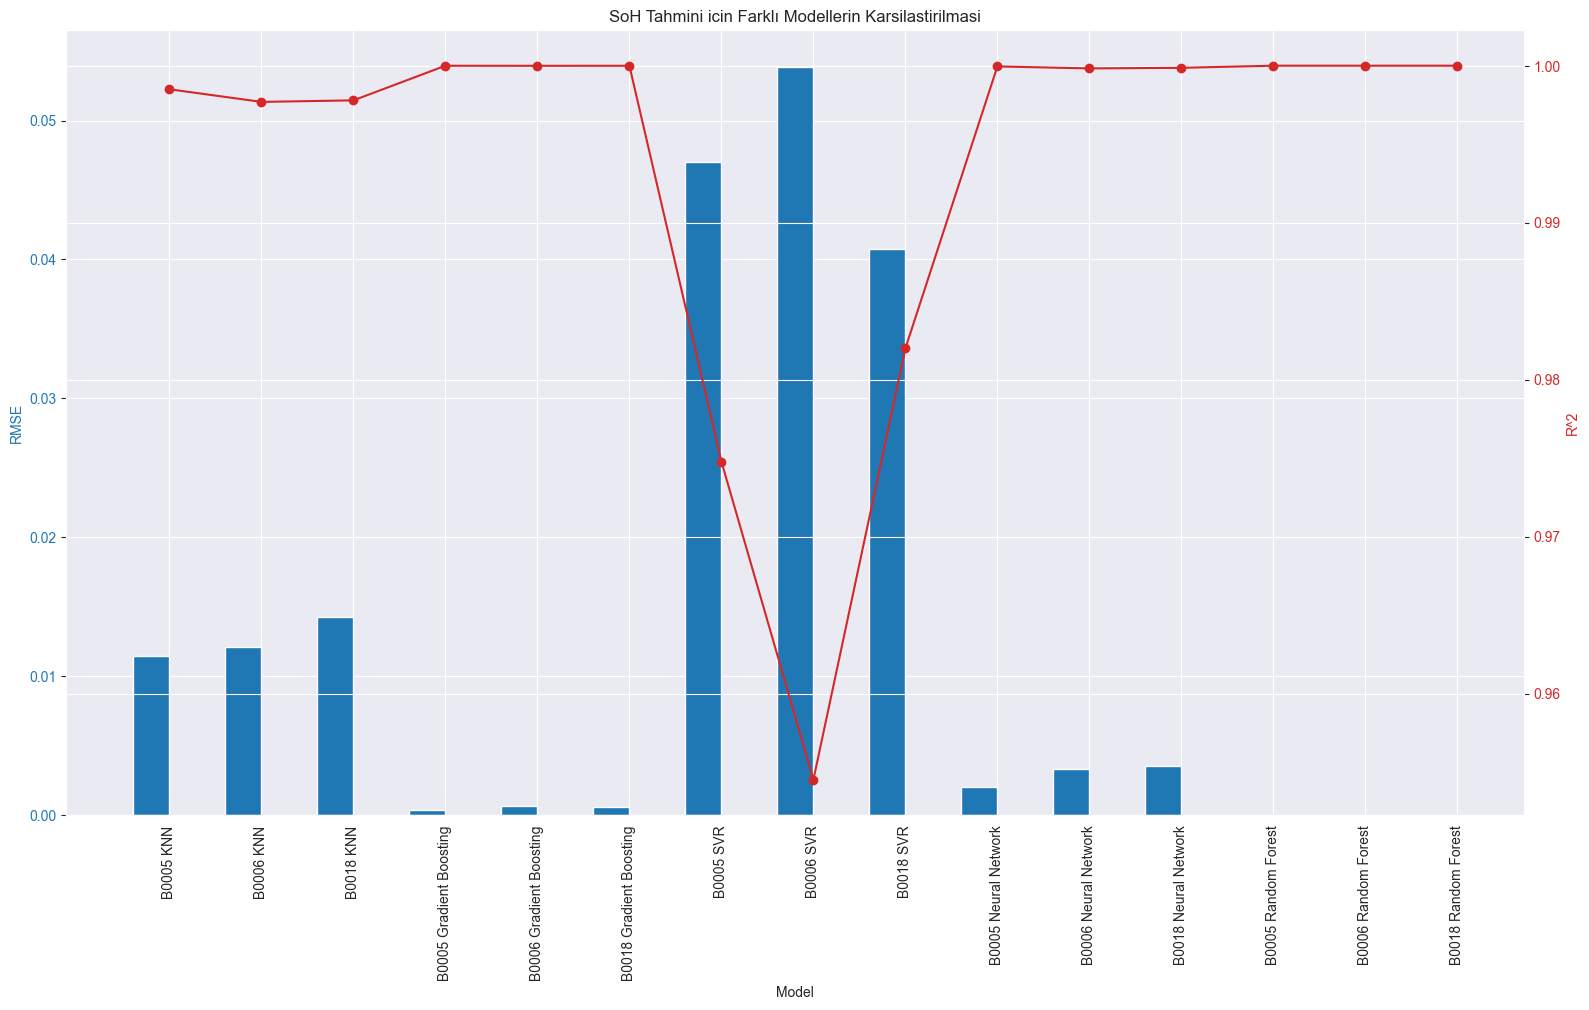

In [127]:
# Modellerin sonuclarini derleme
results = {
    "B0005 KNN": (b0005_knn_rmse, b0005_knn_r2),
    "B0006 KNN": (b0006_knn_rmse, b0006_knn_r2),
    "B0018 KNN": (b0018_knn_rmse, b0018_knn_r2),
    "B0005 Gradient Boosting": (b0005_gb_rmse, b0005_gb_r2),
    "B0006 Gradient Boosting": (b0006_gb_rmse, b0006_gb_r2),
    "B0018 Gradient Boosting": (b0018_gb_rmse, b0018_gb_r2),
    "B0005 SVR": (b0005_svr_rmse, b0005_svr_r2),
    "B0006 SVR": (b0006_svr_rmse, b0006_svr_r2),
    "B0018 SVR": (b0018_svr_rmse, b0018_svr_r2),
    "B0005 Neural Network": (b0005_nn_rmse, b0005_nn_r2),
    "B0006 Neural Network": (b0006_nn_rmse, b0006_nn_r2),
    "B0018 Neural Network": (b0018_nn_rmse, b0018_nn_r2),
    "B0005 Random Forest": (b0005_rf_rmse, b0005_rf_r2),
    "B0006 Random Forest": (b0006_rf_rmse, b0006_rf_r2),
    "B0018 Random Forest": (b0018_rf_rmse, b0018_rf_r2)
}

# Performans grafigi olusturma
labels = list(results.keys())
rmse_values = [result[0] for result in results.values()]
r2_values = [result[1] for result in results.values()]

x = np.arange(len(labels))  # etiket konumlari

fig, ax1 = plt.subplots(figsize=(16, 10))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color=color)
ax1.bar(x - 0.2, rmse_values, 0.4, label='RMSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(x, labels, rotation=90)

ax2 = ax1.twinx()  # ayni x eksenini paylasan ikinci bir eksen olusturma

color = 'tab:red'
ax2.set_ylabel('R^2', color=color)  # x etiketini ax1 ile zaten ele aldik
ax2.plot(x, r2_values, 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # aksi halde sag y etiketi hafifce kirp
plt.title('SoH Tahmini icin Farklı Modellerin Karsilastirilmasi')
plt.show()

In [124]:
# Modeli pickle ile kaydetme fonksiyonu
def save_model_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# B0005 icin Random Forest modelini pickle ile kaydetme
save_model_pickle(b0005_rf_model, 'b0005_rf_model.pkl')

# B0006 icin Random Forest modelini pickle ile kaydetme
save_model_pickle(b0006_rf_model, 'b0006_rf_model.pkl')

# B0018 icin Random Forest modelini pickle ile kaydetme
save_model_pickle(b0018_rf_model, 'b0018_rf_model.pkl')

print("Modeller pickle formatinda basariyla kaydedildi.")

Modeller pickle formatinda basariyla kaydedildi.
